# QCTO - Workplace Module

### Project Title: Exploring urbanization trends and their social and environmental consequences.
#### Done By: Ndivho Mamphiswana

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Statistical Data Analysis</a>

<a href=#seven>7. Modeling </a>

<a href=#eight>8. Evaluation and Validation</a>

<a href=#nine>9. Final Model</a>

<a href=#ten>10. Conclusion and Future Work</a>

<a href=#eleven>11. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* Climate change and sustainability are a huge topic recently, scientists have made it clear that there is an urgent need for reducing carbon emmissions and eventually get to net zero by 2050 (wgbc). There are various social, economic, and environmental factors contributing to the climate change issue, urbanization is one major factor contributing towards this problem.
  
**This project aims to achieve these goals:**

* Analyze urbanization trends in different countries worldwide.
* See how urbanization trends affect the society socially and environmentally.
* Come up with suitable solutions to reduce consequences based on the insights.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [3]:
# These are the packages we need for now.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry_convert as pc
from sklearn.preprocessing import MinMaxScaler

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* The Global Country Information Dataset 2023 was sourced from Kaggle and can be accessed from here: https://www.kaggle.com/code/webdevbadger/forest-area-vs-countries-environment-factors/input?select=world-data-2023.csv
* The GitHub Repository for this project can be accessed from here: https://github.com/ndibo/workplace_module 
* The dataset contains information for approximately 195 countries with 35 columns, covering a wide range of metrics. Here's a general description:

### Size
* Rows: 195 (each row represents a country)
* Columns: 35 (each column represents a different metric or attribute related to the countries)

### Scope
The dataset includes a variety of data points related to different aspects of each country, such as demographic, economic, environmental, and social indicators. These metrics provide a comprehensive view of each country's characteristics.

### Types of Data
* Numerical Data:

Metrics like population, birth rate, life expectancy, GDP, land area, and various economic indicators.
Some columns represent percentages (e.g., agricultural land percentage, unemployment rate) or other numerical values (e.g., CO2 emissions, minimum wage).

* Categorical Data:

Country names, abbreviations, capital cities, and official languages.
Other categorical variables include currency codes and major cities.

* Mixed Data:

Some columns contain both numerical and text data, such as density per square kilometer or out-of-pocket health expenditure.

### Key Metrics Covered:
* Demographics: Population, life expectancy, birth rate, fertility rate, infant mortality.
* Economics: GDP, minimum wage, tax revenue, unemployment rate.
* Environment: CO2 emissions, forested area percentage.
* Social Indicators: Education enrollment rates, health expenditure, physicians per thousand.

This dataset provides a rich source of information for analyzing various global patterns and trends.

---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

Note that the dataset loaded into this notebook on this section is not the original dataset as sourced, some data cleaning was performed on the original dataset (world-data-2023.csv) using Google Sheets, then saved as "cleaning world-data-2023.csv". Note that all datasets are available on this repo: https://github.com/ndibo/workplace_module 

**The following data cleaning steps were followed on the original dataset using Google Sheets before loading the data into this notebook:**

* Column/variable names edited to meet PEP 8 standard.
* 85 rows had missing values, this is about 43,6% of the dataset.
* All rows with more than 30% of missing values (more than 10 missing values) were deleted as imputations would more likely cause detrimental inaccuracies. And 2 more rows with 7 and 10 missing values were also deleted.
* Deleted the “Abbreviation” and “currency-code” columns because of missing values and irrelevance.
* 1 more row deleted because no country name available to identify country and there are 5 missing values in total, we won’t know how to fill in these without country name.
* Imputations on Capital/Major city and Largest city columns done manually based on research.


**Now, let's load the dataset:**

In [4]:
# Load the dataset
df = pd.read_csv("C:/Users/mamph/Downloads/Global Country Information 2023/cleaning world-data-2023.csv")

# Display the first few rows of the dataset
df.head()

,country,density_per_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,cpi,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,93,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,43.10%,"28,748","9,000",11.78,355,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,213,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Angola,26,47.50%,"1,246,700","117,000",40.73,244,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
4,Antigua and Barbuda,223,20.50%,443,0,15.33,1,"St. John's, Saint John",557,113.81,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428


**Before diving into detailed analysis, let's take a look at the structure and summary of the dataset. This will help us understand the data types, identify any missing values and get an overview of the dataset.**

In [5]:
# Display basic information about the dataset
df.info(), df.describe(), df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      184 non-null    object 
 1   density_per_km2                              184 non-null    object 
 2   agricultural_land_percent                    183 non-null    object 
 3   land_area_km2                                184 non-null    object 
 4   armed_forces_size                            170 non-null    object 
 5   birth_rate                                   184 non-null    float64
 6   calling_code                                 184 non-null    int64  
 7   capital_major_city                           184 non-null    object 
 8   co2_emissions                                184 non-null    object 
 9   cpi                                          176 non-null    object 
 10  cp

(None,
        birth_rate  calling_code  fertility_rate  infant_mortality  \
 count  184.000000    184.000000      184.000000        184.000000   
 mean    20.430924    357.364130        2.711739         21.629891   
 std      9.862208    329.997836        1.278473         19.659682   
 min      6.400000      1.000000        0.980000          1.400000   
 25%     11.575000     65.750000        1.710000          6.100000   
 50%     18.125000    251.500000        2.255000         14.000000   
 75%     28.820000    507.500000        3.597500         33.125000   
 max     46.080000   1876.000000        6.910000         84.500000   
 
        life_expectancy  maternal_mortality_ratio  physicians_per_thousand  \
 count       184.000000                180.000000               183.000000   
 mean         72.161413                160.561111                 1.797377   
 std           7.437534                234.142276                 1.629662   
 min          52.800000                  2.000000

In [6]:
def check_data(df):
    """
    - Checks for missing values and duplicates
    - Prints the total number of duplicate rows
    - Prints the count of missing values in each column
    """
    duplicates = df.duplicated().sum()
    print(f"Total number of duplicate rows: {duplicates}")

    null_values = df.isnull().sum()
    print("Missing values in each column:")
    print(null_values)

    return

In [7]:
check_data(df)

Total number of duplicate rows: 0
Missing values in each column:
country                                         0
density_per_km2                                 0
agricultural_land_percent                       1
land_area_km2                                   0
armed_forces_size                              14
birth_rate                                      0
calling_code                                    0
capital_major_city                              0
co2_emissions                                   0
cpi                                             8
cpi_change_percent                              7
fertility_rate                                  0
forested_area_percent                           1
gasoline_price                                 12
gdp                                             0
gross_primary_education_enrollment_percent      1
gross_tertiary_education_enrollment_percent     4
infant_mortality                                0
largest_city                       

**There are no duplicates in this dataset, but there are a lot of missing values in a lot of different columns as shown above.**

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

**We start by creating a copy of the datasets to avoid changing the original dataset**

In [8]:
#Make a copy of the dataframe
df_copy = df.copy()

In [9]:
# Display basic information about the dataset
df_copy.info(), df_copy.describe(), df_copy.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      184 non-null    object 
 1   density_per_km2                              184 non-null    object 
 2   agricultural_land_percent                    183 non-null    object 
 3   land_area_km2                                184 non-null    object 
 4   armed_forces_size                            170 non-null    object 
 5   birth_rate                                   184 non-null    float64
 6   calling_code                                 184 non-null    int64  
 7   capital_major_city                           184 non-null    object 
 8   co2_emissions                                184 non-null    object 
 9   cpi                                          176 non-null    object 
 10  cp

(None,
        birth_rate  calling_code  fertility_rate  infant_mortality  \
 count  184.000000    184.000000      184.000000        184.000000   
 mean    20.430924    357.364130        2.711739         21.629891   
 std      9.862208    329.997836        1.278473         19.659682   
 min      6.400000      1.000000        0.980000          1.400000   
 25%     11.575000     65.750000        1.710000          6.100000   
 50%     18.125000    251.500000        2.255000         14.000000   
 75%     28.820000    507.500000        3.597500         33.125000   
 max     46.080000   1876.000000        6.910000         84.500000   
 
        life_expectancy  maternal_mortality_ratio  physicians_per_thousand  \
 count       184.000000                180.000000               183.000000   
 mean         72.161413                160.561111                 1.797377   
 std           7.437534                234.142276                 1.629662   
 min          52.800000                  2.000000

In [10]:
# Function to clean � signs from the 'capital_major_city' and 'largest_city' columns
#def clean_text_column(column):
    #return df_copy[column].str.replace('�', '', regex=False)

# Function to clean � signs from the 'capital_major_city' and 'largest_city' columns
def clean_text_column(column):
    # Replace non-ASCII characters in the column
    return df_copy[column].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Apply the cleaning function to the columns
df_copy['capital_major_city'] = clean_text_column('capital_major_city')
df_copy['largest_city'] = clean_text_column('largest_city')

# Remove commas and percentage signs, and convert to numeric
def clean_numeric_column(column):
    return pd.to_numeric(df_copy[column].str.replace(',', '').str.replace('%', ''), errors='coerce')

columns_to_clean = [
    'density_per_km2', 'agricultural_land_percent', 'land_area_km2', 
    'armed_forces_size', 'co2_emissions', 'cpi', 'cpi_change_percent', 
    'forested_area_percent', 'gasoline_price', 'gdp', 
    'gross_primary_education_enrollment_percent', 'gross_tertiary_education_enrollment_percent', 
    'minimum_wage', 'out_of_pocket_health_expenditure', 'population', 
    'labor_force_participation_percent', 'tax_revenue_percent', 
    'total_tax_rate', 'unemployment_rate', 'urban_population'
]

# Clean columns and convert to numeric
for col in columns_to_clean:
    df_copy[col] = clean_numeric_column(col)

# Handle missing values
# Drop columns with more than 20% missing values
threshold = 0.8 * len(df_copy)
df_copy.dropna(thresh=threshold, axis=1, inplace=True)

# Fill remaining missing values with median for numerical columns and mode for categorical columns
for col in df_copy.columns:
    if df_copy[col].dtype in ['float64', 'int64']:
        df_copy[col].fillna(df_copy[col].median(), inplace=True)
    elif df_copy[col].dtype == 'object':
        df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)

# Verify the data cleaning process
df_copy.info()
# Save the cleaned data to a CSV file with UTF-8 encoding
df_copy.to_csv('cleaned_world_data_2023.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      184 non-null    object 
 1   density_per_km2                              184 non-null    int64  
 2   agricultural_land_percent                    184 non-null    float64
 3   land_area_km2                                184 non-null    int64  
 4   armed_forces_size                            184 non-null    float64
 5   birth_rate                                   184 non-null    float64
 6   calling_code                                 184 non-null    int64  
 7   capital_major_city                           184 non-null    object 
 8   co2_emissions                                184 non-null    int64  
 9   cpi                                          184 non-null    float64
 10  cp

C:\Users\mamph\AppData\Local\Temp\ipykernel_20604\3283421694.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
C:\Users\mamph\AppData\Local\Temp\ipykernel_20604\3283421694.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

---
<a href=#five></a>
## **Feature Engineering**
<a href=#cont>Back to Table of Contents</a>

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 

---

**First, we load the cleaned dataset:**

In [11]:
# Load the dataset
df_clean = pd.read_csv("C:/Users/mamph/Downloads/Global Country Information 2023/cleaned_world_data_2023.csv")

# Display the first few rows of the dataset
df_clean.head()

,country,density_per_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,cpi,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60,58.1,652230,323000.0,32.49,93,Kabul,8672,149.90,...,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.939110,67.709953
1,Albania,105,43.1,28748,9000.0,11.78,355,Tirana,4536,119.05,...,56.9,1.20,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331
2,Algeria,18,17.4,2381741,317000.0,24.28,213,Algiers,150006,151.36,...,28.1,1.72,43053054,41.2,37.2,66.1,11.70,31510100,28.033886,1.659626
3,Angola,26,47.5,1246700,117000.0,40.73,244,Luanda,34693,261.73,...,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887
4,Antigua and Barbuda,223,20.5,443,0.0,15.33,1,"St. John's, Saint John",557,113.81,...,24.3,2.76,97118,62.6,16.5,43.0,5.36,23800,17.060816,-61.796428


In [12]:
# Make a copy of the cleaned data
df_clean_copy = df_clean.copy()

### Missing Values

In [13]:
null_counts = df_clean_copy.isnull().sum()
null_counts

country                                        0
density_per_km2                                0
agricultural_land_percent                      0
land_area_km2                                  0
armed_forces_size                              0
birth_rate                                     0
calling_code                                   0
capital_major_city                             0
co2_emissions                                  0
cpi                                            0
cpi_change_percent                             0
fertility_rate                                 0
forested_area_percent                          0
gross_primary_education_enrollment_percent     0
gross_tertiary_education_enrollment_percent    0
infant_mortality                               0
largest_city                                   0
life_expectancy                                0
maternal_mortality_ratio                       0
official_language                              0
out_of_pocket_health

There are no missing values in the dataset.

### Encoding Categorical Variables

We need to encode the following categorical columns: 'capital_major_city' and 'largest_city'. This is to ensure that we can use them on machine learning models.

We do not one-hot encode the 'country' column because this will create a very large number of features (one for each country) and it is not necessary.

In [14]:
# One-hot encoding categorical columns
df_clean_copy = pd.get_dummies(df_copy, columns=['capital_major_city', 'largest_city'], drop_first=True)

### Binning Numeric Variables

Below, we bin certain numeric variables to capture trends across different ranges of numeric values.

In [15]:
# Binning Population into three categories: low, medium, high
df_clean_copy['population_binned'] = pd.cut(df_clean_copy['population'], bins=3, labels=["low", "medium", "high"])

# Binning urban population similarly
df_clean_copy['urban_population_binned'] = pd.cut(df_clean_copy['urban_population'], bins=3, labels=["low", "medium", "high"])

# Binning agricultural_land_percent similarly
df_clean_copy['agricultural_land_percent_binned'] = pd.cut(df_clean_copy['agricultural_land_percent'], bins=3, labels=["low", "medium", "high"])

# Binning co2_emissions similarly
df_clean_copy['co2_emissions_binned'] = pd.cut(df_clean_copy['co2_emissions'], bins=3, labels=["low", "medium", "high"])

# Binning cpi similarly
df_clean_copy['cpi_binned'] = pd.cut(df_clean_copy['cpi'], bins=3, labels=["low", "medium", "high"])

# Binning fertility_rate similarly
df_clean_copy['fertility_rate_binned'] = pd.cut(df_clean_copy['fertility_rate'], bins=3, labels=["low", "medium", "high"])

# Binning forested_area similarly
df_clean_copy['forested_area_percent_binned'] = pd.cut(df_clean_copy['forested_area_percent'], bins=3, labels=["low", "medium", "high"])

# Binning infant_mortality similarly
df_clean_copy['infant_mortality_binned'] = pd.cut(df_clean_copy['infant_mortality'], bins=3, labels=["low", "medium", "high"])


# Binning life_expectancy similarly
df_clean_copy['life_expectancy_binned'] = pd.cut(df_clean_copy['life_expectancy'], bins=3, labels=["low", "medium", "high"])

### Creating New Features

To further explore the consequences of urbanization, we create a new feature 'urbanization_rate' that may reveal interesting patterns. We also create another new feature 'region'.

In [16]:
# Creating new feature 'urbanization_rate'
df_clean_copy['urbanization_rate'] = df_clean_copy['urban_population'] / df_clean_copy['population']

# Function to get continent code
def country_to_continent(country_name):
    try:
        # Get the country alpha-2 code from the country name
        country_code = pc.country_name_to_country_alpha2(country_name)
        # Get the continent code from the country alpha-2 code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        # Convert continent code to full continent name
        continents = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continents[continent_code]
    except:
        return 'Other'  # In case country name is not found

# Apply the function to create a 'region' column
df_clean_copy['region'] = df_clean_copy['country'].apply(country_to_continent)

# Display the first few rows to verify the new 'region' column
df_clean_copy.head()

,country,density_per_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_percent,...,urban_population_binned,agricultural_land_percent_binned,co2_emissions_binned,cpi_binned,fertility_rate_binned,forested_area_percent_binned,infant_mortality_binned,life_expectancy_binned,urbanization_rate,region
0,Afghanistan,60,58.1,652230,323000.0,32.49,93,8672,149.90,2.3,...,low,high,low,low,medium,low,medium,medium,0.257540,Asia
1,Albania,105,43.1,28748,9000.0,11.78,355,4536,119.05,1.4,...,low,medium,low,low,low,low,low,high,0.612290,Europe
2,Algeria,18,17.4,2381741,317000.0,24.28,213,150006,151.36,2.0,...,low,low,low,low,medium,low,low,high,0.731890,Africa
3,Angola,26,47.5,1246700,117000.0,40.73,244,34693,261.73,17.1,...,low,medium,low,low,high,medium,medium,low,0.661770,Africa
4,Antigua and Barbuda,223,20.5,443,0.0,15.33,1,557,113.81,1.2,...,low,low,low,low,low,low,low,high,0.245063,North America


### Feature Scaling

To ensure that all numeric features are on the same scale, we apply scaling methods to these features.

In [17]:
#Scale numeric features using MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = ['density_per_km2', 'agricultural_land_percent', 'land_area_km2', 
    'armed_forces_size', 'co2_emissions', 'cpi', 'cpi_change_percent', 
    'forested_area_percent', 'gross_primary_education_enrollment_percent', 
    'gross_tertiary_education_enrollment_percent', 
    'out_of_pocket_health_expenditure', 'population', 
    'labor_force_participation_percent', 'tax_revenue_percent', 
    'total_tax_rate', 'unemployment_rate', 'urban_population', 'urbanization_rate']

df_clean_copy[scaled_columns] = scaler.fit_transform(df_clean_copy[scaled_columns])



### Handling Outliers

We now handle outliers in numeric columns using IQR method.

In [18]:
# Loop through all numeric columns and handle outliers using the IQR method
numeric_columns = df_clean_copy.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    Q1 = df_clean_copy[col].quantile(0.25)
    Q3 = df_clean_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers for each numeric column
    df_clean_copy = df_clean_copy[(df_clean_copy[col] >= lower_bound) & (df_clean_copy[col] <= upper_bound)]

# Verify the data after handling outliers
df_clean_copy.info() , df_clean_copy.describe() , df_clean_copy.columns

# Save the cleaned dataset to a CSV file
df_clean_copy.to_csv('featured_dataset.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 4 to 170
Columns: 404 entries, country to region
dtypes: bool(365), category(9), float64(26), int64(1), object(3)
memory usage: 24.8+ KB


---
<a href=#five></a>
## **6. Statistical Data Analysis**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [19]:
df_clean_copy.head()

,country,density_per_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_percent,...,urban_population_binned,agricultural_land_percent_binned,co2_emissions_binned,cpi_binned,fertility_rate_binned,forested_area_percent_binned,infant_mortality_binned,life_expectancy_binned,urbanization_rate,region
4,Antigua and Barbuda,0.026448,0.242683,0.000015,0.000000,15.33,1,0.000050,0.003296,0.021219,...,low,low,low,low,low,low,low,high,0.147601,North America
8,Austria,0.012805,0.387805,0.004895,0.006928,9.70,43,0.006205,0.004243,0.022377,...,low,medium,low,low,low,medium,low,high,0.531593,Europe
9,Azerbaijan,0.014481,0.696341,0.005054,0.027054,14.00,994,0.003796,0.012775,0.026620,...,low,high,low,low,low,low,low,medium,0.503547,Asia
14,Belarus,0.005385,0.504878,0.012131,0.051138,9.90,375,0.005884,0.005867,0.038194,...,low,medium,low,low,low,medium,low,high,0.763386,Europe
15,Belgium,0.045596,0.536585,0.001775,0.010558,10.30,32,0.009787,0.004032,0.021991,...,low,medium,low,low,low,low,low,high,0.977881,Europe


In [20]:
# Display all column names as a list
columns_list = df_clean_copy.columns.tolist()
print(columns_list)


['country', 'density_per_km2', 'agricultural_land_percent', 'land_area_km2', 'armed_forces_size', 'birth_rate', 'calling_code', 'co2_emissions', 'cpi', 'cpi_change_percent', 'fertility_rate', 'forested_area_percent', 'gross_primary_education_enrollment_percent', 'gross_tertiary_education_enrollment_percent', 'infant_mortality', 'life_expectancy', 'maternal_mortality_ratio', 'official_language', 'out_of_pocket_health_expenditure', 'physicians_per_thousand', 'population', 'labor_force_participation_percent', 'tax_revenue_percent', 'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude', 'longitude', 'capital_major_city_Abuja', 'capital_major_city_Accra', 'capital_major_city_Addis Ababa', 'capital_major_city_Algiers', 'capital_major_city_Amman', 'capital_major_city_Amsterdam', 'capital_major_city_Ankara', 'capital_major_city_Antananarivo', 'capital_major_city_Apia', 'capital_major_city_Ashgabat', 'capital_major_city_Asmara', 'capital_major_city_Astana', 'capital_major_city_A

### 6.1. Urbanization Analysis

* **Key Variables:** density_per_km2, urban_population, urbanization_rate.
* **Purpose:** Understand trends in population density, urban population levels, and urbanization rates across different countries.

#### Summary Statistics

In [21]:
# Descriptive statistics
df_clean_copy[['density_per_km2', 'urban_population', 'urbanization_rate']].describe()


,density_per_km2,urban_population,urbanization_rate
count,39.000000,39.000000,39.000000
mean,0.014720,0.004417,0.598922
std,0.012834,0.003848,0.197454
min,0.000120,0.000002,0.147601
25%,0.004368,0.000898,0.483725
50%,0.012087,0.003652,0.613442
75%,0.022020,0.006652,0.713186
max,0.047630,0.013340,0.977881


**Insights and Trends:**

* Wide variations in population density highlight diverse urbanization patterns across countries.
* The substantial spread in urban population sizes indicates an uneven distribution of urbanization globally.
* The average urbanization rate of 60% suggests a general trend towards increased urbanization.
n.

#### Distribution Analysis 

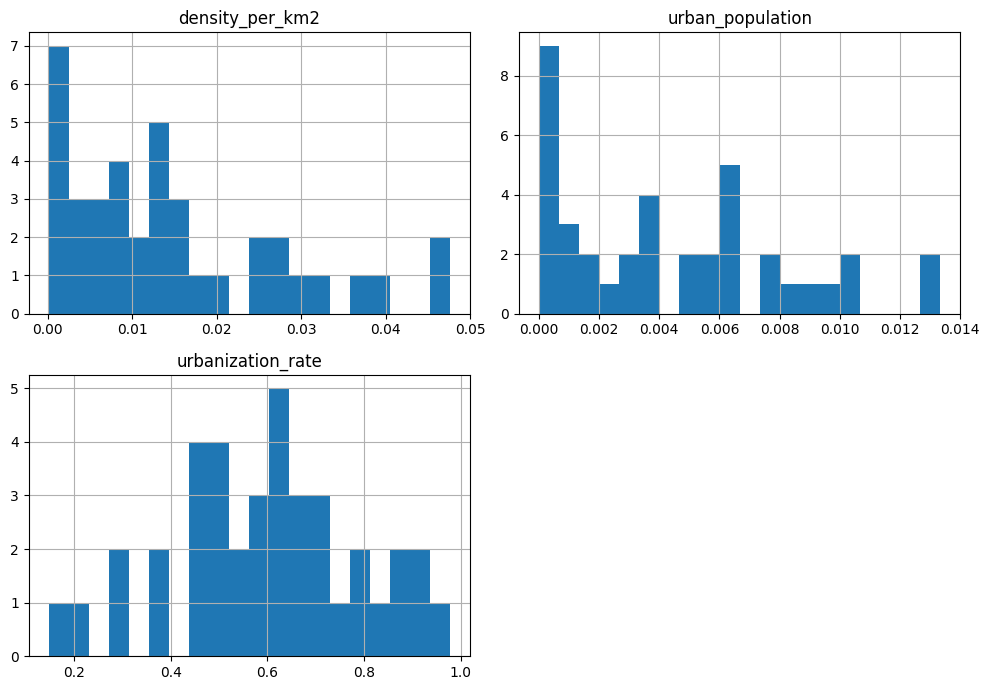

In [22]:
# Histogram to show distribution
df_clean_copy[['density_per_km2', 'urban_population', 'urbanization_rate']].hist(bins=20, figsize=(10, 7))
plt.tight_layout()

# Save the plot as a file
plt.savefig('histogram_distribution.png') 

plt.show()


#### Distribution of Selected Indicators

The histogram below shows the distribution of three key indicators:

1. **Population Density per km²** (`density_per_km2The histogram for density per km2 is heavily right-skewed, indicating that most countries have relatively low population densities, while a few countries have extremely high densities. This reflects the concentration of populations in urban centers in certain countries.ion.

2. **Urban Population** (`urban_population`): The urban population data also shows a right-skewed distribution, with many areas having very low urban population percentages and a small number of areas with higher values. This suggests a concentration of low urban population regions in the dataset.

3. **Urbanization Rate** (`urbanization_The histogram for urbanization rate appears to be slightly right-skewed but more evenly distributed, indicating that while most countries have urbanization rates around the average of 60%, there is a tendency towards higher urbanization rates in some countries. This highlights a global trend towards increasing urbanization.zbution.png)


#### Correlation Analysis

In [23]:
# Correlation matrix to check for relationships
df_clean_copy[['density_per_km2', 'urban_population', 'urbanization_rate']].corr()

,density_per_km2,urban_population,urbanization_rate
density_per_km2,1.000000,0.237508,0.099290
urban_population,0.237508,1.000000,0.465139
urbanization_rate,0.099290,0.465139,1.000000


**Insights:** 
Population density does not closely relate to urban population size or the rate of urbanization. Urban population size shows a moderate association with urbanization rate, indicating that larger urban areas might be expanding, but not consistently across all regions.

### 6.2. Social Consequences Analysis

* **Key Variables:** birth_rate, life_expectancy, maternal_mortality_ratio, infant_mortality, gross_primary_education_enrollment_percent, gross_tertiary_education_enrollment_percent
* **Purpose:** Assess the quality of life indicators and education enrollment rates as proxies for social impact.

#### Correlation and Statistics Summaries

In [26]:
# Correlation and statistical summaries
social_corr = df_clean_copy[social_columns].corr()
print("Social Correlation Matrix:\n", social_corr)

Social Correlation Matrix:
                                              birth_rate  life_expectancy  \
birth_rate                                     1.000000        -0.597307   
life_expectancy                               -0.597307         1.000000   
maternal_mortality_ratio                       0.604162        -0.574493   
infant_mortality                               0.717131        -0.742804   
gross_primary_education_enrollment_percent     0.011162         0.078155   
gross_tertiary_education_enrollment_percent   -0.543818         0.442258   

                                             maternal_mortality_ratio  \
birth_rate                                                   0.604162   
life_expectancy                                             -0.574493   
maternal_mortality_ratio                                     1.000000   
infant_mortality                                             0.639989   
gross_primary_education_enrollment_percent                   0.155915   
g

### Analysis of Social Indicator Correlations

The correlation matrix below reveals interesting relationships between various social indicators. Here’s a closer look at some of the more notable correlations:

1. **Birth Rate**:
   - There is a **strong positive correlation with maternal mortality ratio (0.60)** and **infant mortality (0.72)**. This suggests that areas with higher birth rates also tend to have higher rates of maternal and infant mortality, possibly indicating lower healthcare access or quality in regions with higher birth rates.
   - **Negative correlation with life expectancy (-0.60)**: Higher birth rates are associated with lower life expectancy, which might reflect socioeconomic and healthcare disparities in regions with higher birth rates.

2. **Life Expectancy**:
   - There is a **strong negative correlation with infant mortality (-0.74)**, meaning regions with higher life expectancy tend to have lower infant mortality. This relationship is expected, as areas with better healthcare and living conditions usually have lower infant mortality rates.
   - **Positive correlation with gross tertiary education enrollment (0.44)**: Regions with higher life expectancy also have higher enrollment in tertiary education, possibly indicating a link between improved education access and longer, healthier lives.

3. **Maternal Mortality Ratio**:
   - Shows a **positive correlation with infant mortality (0.64)**: Regions with high maternal mortality tend to also have high infant mortality rates, further pointing to disparities in healthcare quality or access.
   - **Negative correlation with gross tertiary education enrollment (-0.54)**: This suggests that areas with higher education enrollment might have lower maternal mortality rates, possibly due to better healthcare knowledge and resources.

4. **Gross Tertiary Education Enrollment**:
   - Negatively correlated with **birth rate (-0.54)** and **infant mortality (-0.65)**, indicating that areas with higher education enrollment rates tend to have lower birth rates and infant mortality. This could reflect the broader social benefits of education, which often include improved health outcomes and family planning.

5. **Gross Primary Education Enrollment**:
   - This variable has relatively weak correlations with other indicators, indicating it might not have a strong, direct relationship with health-related outcomes in this dataset.

### Key Takeaways
Overall, this correlation matrix highlights several significant associations. Higher education levels, particularly tertiary education, tend to be associated with better health outcomes (e.g., higher life expectancy, lower birth and infant mortality rates). In contrast, higher birth rates correlate with increased maternal and infant mortality, possibly indicating regions with limited access to quality healthcare. These insights could guide further analysis or policy considerations, especially in addressing healthcare and educational disparities.



### **6.3. Environmental Consequences Analysis**

* **Key Variables:** co2_emissions, forested_area_percent, agricultural_land_percent
* **Purpose:** Identify environmental conditions impacted by urbanization and assess sustainability indicators.

#### Descriptive Statistics

In [27]:
# Descriptive statistics for environmental factors
env_columns = ['co2_emissions', 'forested_area_percent', 'agricultural_land_percent']
df_clean_copy[env_columns].describe()

,co2_emissions,forested_area_percent,agricultural_land_percent
count,39.000000,39.000000,39.000000
mean,0.002608,0.359053,0.431176
std,0.002421,0.193034,0.225990
min,0.000000,0.005086,0.025610
25%,0.000710,0.208545,0.274390
50%,0.001689,0.360122,0.398780
75%,0.004181,0.492879,0.577439
max,0.009787,0.743642,0.924390


### Descriptive Statistics for Environmental Factors

The table below provides a summary of key environmental factors across different regions. Here’s a closer look at what these statistics reveal:

1. **CO₂ Emissions**:
   - The average CO₂ emissions value is **0.0026**, with a standard deviation of **0.0024**, indicating some variability in emissions across regions.
   - The minimum value is **0.0**, suggesting there are regions with no reported CO₂ emissions, while the maximum value reaches **0.0098**, showing that certain regions have relatively high emissions.
   - Most regions have CO₂ emissions below **0.0042** (75th percentile), meaning that only a few regions contribute significantly higher emissions than the rest.

2. **Forested Area Percentage**:
   - The average forest cover across regions is **35.9%**, but there’s a fairly high standard deviation of **19.3%**. This suggests considerable diversity in forest cover among the regions.
   - The range of forested areas spans from a low of **0.5%** to a high of **74.4%**, showing a wide spectrum in forested land. Some regions are heavily forested, while others have minimal forest coverage.
   - The median (50th percentile) forested area is **36.0%**, close to the mean, indicating a fairly balanced distribution with a slight skew towards higher forest cover in some regions.

3. **Agricultural Land Percentage**:
   - On average, **43.1%** of land is used for agriculture across the regions, with a standard deviation of **22.6%**, again indicating a wide range of land use for agriculture.
   - The minimum and maximum values (2.6% and 92.4%) illustrate the diversity in how regions utilize their land, from very low to very high agricultural coverage.
   - The 25th and 75th percentiles (27.4% and 57.7%) show that most regions fall within this range, with a few outliers utilizing almost all available land for agriculture.

### Summary Insights
This descriptive summary highlights the wide variation in environmental factors across regions. Some regions have high CO₂ emissions, low forest cover, or extensive agricultural land use, while others show tmissions reductions.



#### Boxplot

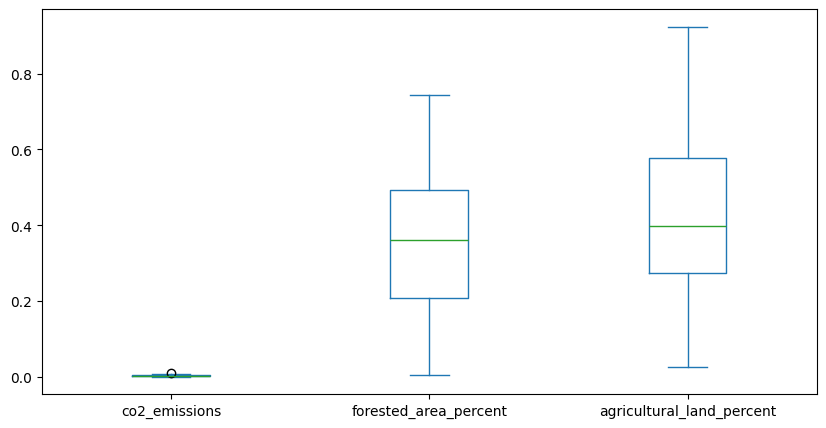

In [28]:
# Boxplot for outliers and data distribution
df_clean_copy[env_columns].plot(kind='box', figsize=(10, 5))
# Save the plot as a file
plt.savefig('boxplot.png') 

# Show plot
plt.show()

### Boxplot Analysis of Environmental Indicators

The boxplot below shows the spread and central tendency of three key environmental indicators:

1. **CO₂ Emissions** (`co2_emissions`): This variable shows a highly compressed range, with values clustered around very low levels. There is minimal variability here, indicating that CO₂ emissions in most areas in the dataset are close to zero. The presence of a few outliers suggests that a small number of areas contribute disproportionately to CO₂ emissions compared to the majority.

2. **Forested Area Percentage** (`forested_area_percent`): The forested area distribution is more balanced, with the data spread between roughly 0.2 and 0.7. The median is close to 0.4, which suggests that many areas have moderate forest coverage. However, the boxplot reveals some variability, with values ranging across the spectrum, reflecting diversity in forested land among different regions.

3. **Agricultural Land Percentage** (`agricultural_land_percent`): This variable has the widest spread among the three indicators, indicating significant variation in agricultural land coverage. The interquartile range (IQR) spans from about 0.2 to 0.6, with a median around 0.4. This suggests that while some areas dedicate a large proportion of land to agriculture, others have very little agricultural land, highlighting regional differences in land use.


#### Correlation Analysis

In [29]:
# Correlation analysis
env_corr = df_clean_copy[env_columns].corr()
print("Environmental Correlation Matrix:\n", env_corr)

Environmental Correlation Matrix:
                            co2_emissions  forested_area_percent  \
co2_emissions                   1.000000              -0.194496   
forested_area_percent          -0.194496               1.000000   
agricultural_land_percent       0.199582              -0.523900   

                           agricultural_land_percent  
co2_emissions                               0.199582  
forested_area_percent                      -0.523900  
agricultural_land_percent                   1.000000  


### Correlation Analysis of Environmental Factors

The correlation matrix below provides insights into the relationships between CO₂ emissions, forested area, and agricultural land across different regions. Here’s what we can observe:

1. **CO₂ Emissions**:
   - CO₂ emissions have a **weak negative correlation with forested area (-0.19)**, suggesting that regions with more forest cover may tend to have slightly lower CO₂ emissions. However, this correlation is relatively weak and may not indicate a strong direct relationship.
   - There’s a **weak positive correlation with agricultural land (0.20)**, indicating a slight tendency for regions with more agricultural land to have higher CO₂ emissions. This could be due to agricultural practices contributing to emissions, though the relationship here is also weak.

2. **Forested Area Percent**:
   - Forested area has a **moderate negative correlation with agricultural land (-0.52)**. This makes intuitive sense, as regions with more forest cover tend to have less land available for agriculture, and vice versa. This relationship suggests some competition between forested and agricultural land uses in certain regions.

3. **Agricultural Land Percent**:
   - The positive correlation with CO₂ emissions (0.20) and the negative correlation with forested area (-0.52) indicate that regions with extensive agricultural land may have reduced forest cover and slightly higher emissions, though these correlations are not particularly strong.

### Key Takeaways
This correlation analysis suggests that there is a modest inverse relationship between forest cover and agricultural land, which aligns with the idea that land use decisions often trade off between forest preservation and agricultural expansion. However, the relationships between CO₂ emissions and these land-use factors are relatively weak, hinting that CO₂ emissions might be influenced by a wider range of factors beyond just forested or agricultural lans CO₂ emissions.



### **6.4. Urbanization and Environmental Impact**

* **Purpose:** Identify how urbanization correlates with environmental degradation or sustainability efforts.

#### Relationship between urbanization rate and CO2 emissions

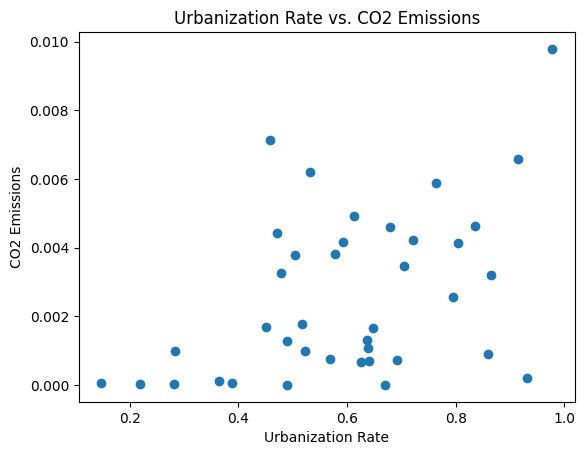

In [30]:
# Scatter plot of urbanization rate vs. CO2 emissions
plt.scatter(df_clean_copy['urbanization_rate'], df_clean_copy['co2_emissions'])
plt.xlabel('Urbanization Rate')
plt.ylabel('CO2 Emissions')
plt.title('Urbanization Rate vs. CO2 Emissions')

# Save the plot as a file
plt.savefig('scatter plot.png') 

# Show plot
plt.show()


### Scatter Plot Analysis: Urbanization Rate vs. CO₂ Emissions

The scatter plot below examines the relationship between **Urbanization Rate** and **CO₂ Emissions** across different regions.

At first glance, there doesn't appear to be a strong, clear trend between urbanization rate and CO₂ emissions. Most of the data points are clustered near the lower end of CO₂ emissions, regardless of the urbanization rate. This suggests that a higher urbanization rate does not consistently correlate with higher CO₂ emissions in this dataset.

However, we do see a few instances where regions with higher urbanization rates (close to 1.0) also have slightly elevated CO₂ emissions. This could indicate that, in some cases, urbanized areas might be associated with more industrial or economic activity, leading to higher emissions. That said, the scatter remains quite spread out, showing a lot of variability and suggesting that urbanization alone may not be a strong predictor of CO₂ emissions in this conplot.png)


#### Correlation Analysis

In [31]:
# Correlation between urbanization and environmental factors
combined_columns = ['urbanization_rate', 'density_per_km2', 'co2_emissions', 'forested_area_percent', 'agricultural_land_percent']
df_clean_copy[combined_columns].corr()

,urbanization_rate,density_per_km2,co2_emissions,forested_area_percent,agricultural_land_percent
urbanization_rate,1.000000,0.099290,0.446578,-0.152503,0.131818
density_per_km2,0.099290,1.000000,0.200693,-0.241796,0.103767
co2_emissions,0.446578,0.200693,1.000000,-0.194496,0.199582
forested_area_percent,-0.152503,-0.241796,-0.194496,1.000000,-0.523900
agricultural_land_percent,0.131818,0.103767,0.199582,-0.523900,1.000000


### Correlation Analysis: Urbanization and Environmental Factors

The correlation matrix below explores how urbanization and population density relate to key environmental factors like CO₂ emissions, forested area, and agricultural land. Let’s break down what these relationships mean:

1. **Urbanization Rate**:
   - There is a **moderate positive correlation with CO₂ emissions (0.45)**. This suggests that as urbanization rates increase, CO₂ emissions also tend to rise. This could be due to increased industrial activities, transportation, and energy demand in more urbanized areas.
   - A **slight negative correlation with forested area (-0.15)** indicates that higher urbanization may be associated with less forest cover, although the relationship is weak. Urban expansion can sometimes reduce forest areas, but other factors likely influence this balance as well.
   - There’s a **small positive correlation with agricultural land (0.13)**, suggesting that urbanization might slightly align with agricultural expansion. However, the weak correlation here implies that urban and agricultural land uses don’t strongly impact each other in most regions.

2. **Population Density**:
   - Population density shows a **weak positive correlation with CO₂ emissions (0.20)**. This means that regions with denser populations may produce slightly higher emissions, though the relationship is not very strong.
   - A **negative correlation with forested area (-0.24)** implies that denser regions may have less forest cover, which could reflect urban areas where forests are cleared for development.
   - The correlation between density and agricultural land is very low (0.10), indicating that population density doesn’t significantly influence agricultural land use.

3. **CO₂ Emissions**:
   - Besides the connections to urbanization and population density, CO₂ emissions have weak correlations with forested area (-0.19) and agricultural land (0.20), as seen in the previous analysis. This suggests that factors other than land use (like industrialization levels) might be major contributors to CO₂ emissions.

4. **Forested Area and Agricultural Land**:
   - Consistent with previous findings, forested area and agricultural land have a **moderate negative correlation (-0.52)**. This supports the idea that there’s a trade-off between preserving forests and expanding agricultural land in certain regions.

### Summary Insights
This analysis highlights that urbanization and population density have some influence on environmental factors, especially on CO₂ emissions. Urbanized regions tend to emit more CO₂, possibly due to industrial activities and energy demands associated with city life. However, the relatively weak correlations with forested and agricultural land suggest that other factors also play a role in shaping land use anas urban areas grow.



### **6.5. Regional Comparisons**

* **Key Variable:** region
* **Purpose:** Regional analysis helps determine which areas might be experiencing more intense urbanization and its social/environmental consequences.

In [32]:
# Group by region and get mean values for relevant variables
regional_analysis = df_clean_copy.groupby('region')[combined_columns].mean()
print(regional_analysis)


               urbanization_rate  density_per_km2  co2_emissions  \
region                                                             
Asia                    0.525111         0.014142       0.003213   
Europe                  0.705420         0.012054       0.003452   
North America           0.479940         0.021487       0.001054   
Oceania                 0.490040         0.017353       0.000000   
Other                   0.577423         0.008377       0.003805   
South America           0.581471         0.005086       0.002448   

               forested_area_percent  agricultural_land_percent  
region                                                           
Asia                        0.212106                   0.470528  
Europe                      0.379168                   0.429743  
North America               0.431518                   0.367738  
Oceania                     0.152594                   0.504878  
Other                       0.111902                   0.77

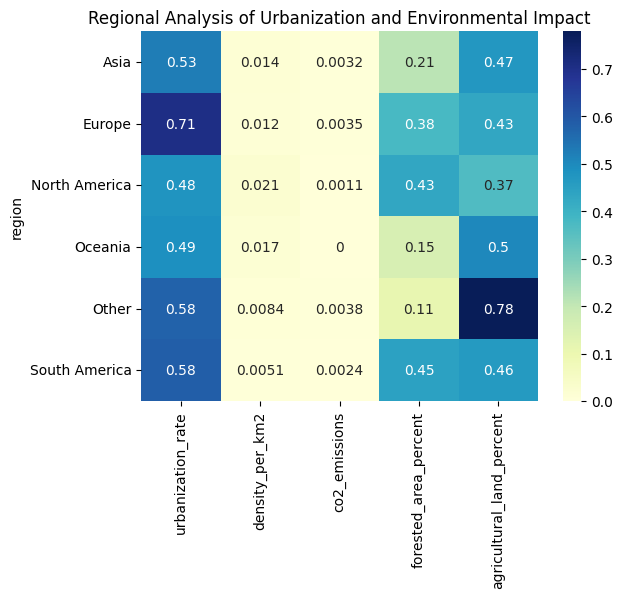

In [33]:
# Heatmap to show differences across regions
sns.heatmap(regional_analysis, annot=True, cmap='YlGnBu')
plt.title('Regional Analysis of Urbanization and Environmental Impact')

# Save the plot as a file
plt.savefig('heatmap.png') 

# Show plot
plt.show()


### Regional Analysis of Urbanization and Environmental Impact

The heatmap below provides a regional overview of several key indicators related to urbanization and environmental impact, with darker colors representing higher values. Here’s a breakdown of what we can observe:

- **Urbanization Rate**: Europe has the highest urbanization rate (0.71), followed by the "Other" category and South America (both at 0.58). This suggests that Europe and some regions in "Other" are more urbanized than areas like Oceania and North America.

- **Population Density (density_per_km²)**: North America and Oceania have very low population densities compared to Asia and Europe. Asia’s higher density (0.014) reflects the crowded urban and rural regions found across the continent.

- **CO₂ Emissions**: Europe and Asia have higher CO₂ emissions values (0.0035 and 0.0032, respectively), indicating they might contribute more heavily to emissions compared to regions like North America and Oceania. This aligns with these regions' higher industrial activity.

- **Forested Area Percentage**: Oceania and South America stand out with higher forest coverage, particularly Oceania (0.5), which shows a notable focus on preserving or maintaining natural land cover.

- **Agricultural Land Percentage**: The "Other" category has the highest percentage of agricultural land (0.78), suggesting a region or group of regions where agriculture is a major land use. Other regions, like Oceania and Asia, have much lower values, reflecting a lower dependence on agriculture for land use.

This heatmap helps illustrate the diversity in urbanization and environmental characteristics across regions. For instance, Europe’s high urbanization and CO₂ emissions stand in contrast to Oceania’s low population density and higher forest cover. These insights could inform decisions around regional environmental policies and strategies for sustainable urba ta/heatmap.png)


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [35]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [36]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [37]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
